In [1]:
#import pandas as pd
import numpy as np
import datetime
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure

In [3]:
import tensorflow as tf
from keras import layers
from keras import models
import gc
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
def make_target(era_fname, mapping):
    era = np.load(era_fname)
    data = np.reshape(era, (era.shape[0],era.shape[1], -1))
    target = np.zeros((24,3,len(mapping)))
    for i in range(len(mapping)):
        target[:,:,i] = data[:,:,mapping[i]]
    
    return target


In [5]:
mapping = np.load('wrferaMapping.npy')
landmask = np.load('landmask.npy')

In [304]:
#creates era files mapped to wrf node matrixwrf_shape = (24,3,210,280)
wrf_shape = (24,3,210,280)

era_path = os.getcwd()+'\\train\\era5\\'
target_path = os.getcwd()+'\\train\\target\\'
for dirname, _, filenames in os.walk(era_path):
    for filename in filenames:
        era_fname = os.path.join(era_path, filename)
        df = make_target(era_fname, mapping)
        target_fname = os.path.join(target_path,filename)
        df = np.reshape(df,wrf_shape)
        np.save(target_fname,df)
    

(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58800)
(24, 3, 58

KeyboardInterrupt: 

In [6]:
def scale_data(data):
    data[:,2,:,:] = data[:,2,:,:]/100
    data=data/20
    return data
def invert_scale_data(data):
    data=data*20
    data[:,2,:,:] = data[:,2,:,:]*100
    return data

In [7]:
def scale_error(error):
    error=error/20
    return error
def invert_scale_error(error):
    error=error*20
    return error

In [42]:
import os
import glob
import numpy as np
import tensorflow as tf

# Specify the folder containing your .npy files

wrf_path = os.getcwd()+'\\train\\wrf\\'
target_path = os.getcwd()+'\\train\\target\\'
# Get a list of .npy files in the folder
file_list = sorted(glob.glob(os.path.join(wrf_path, '*.npy')))
target_list = sorted(glob.glob(os.path.join(target_path, '*.npy')))
# Shuffle the file list if needed
numbers = list(range(len(file_list)))
np.random.shuffle(numbers)
print(numbers)
# Define a custom data generator iterator
def data_generator(file_list, target_list, numbers, epochs):
    for k in range(epochs):
        for i in numbers:
            # Load data from the .npy file
            data = np.load(file_list[i])
            #scaling wrf data, but not target era5
            data = scale_data(data)
            target = np.load(target_list[i])
            
            yield data, target



None


In [53]:
#np.random.shuffle(numbers)
print(numbers)

[127, 103, 74, 10, 255, 170, 289, 124, 221, 286, 272, 267, 219, 295, 213, 138, 26, 128, 160, 218, 86, 130, 287, 25, 169, 174, 44, 145, 312, 140, 156, 311, 64, 308, 117, 106, 323, 244, 181, 137, 114, 14, 215, 52, 166, 90, 11, 224, 245, 20, 34, 118, 84, 331, 7, 249, 82, 111, 105, 220, 5, 254, 336, 281, 0, 350, 63, 42, 104, 275, 121, 329, 109, 75, 345, 332, 202, 168, 304, 322, 179, 276, 326, 110, 320, 165, 268, 112, 298, 45, 200, 340, 180, 233, 135, 199, 33, 122, 159, 18, 167, 225, 4, 263, 248, 173, 355, 234, 269, 139, 31, 48, 152, 241, 356, 162, 305, 314, 2, 70, 338, 68, 271, 309, 231, 306, 65, 330, 184, 293, 282, 107, 79, 27, 260, 258, 24, 347, 13, 344, 363, 239, 6, 285, 288, 339, 12, 240, 172, 35, 21, 123, 265, 250, 190, 195, 209, 321, 204, 163, 99, 205, 193, 186, 294, 95, 155, 334, 315, 201, 232, 342, 92, 197, 150, 211, 346, 72, 319, 273, 131, 229, 16, 100, 243, 116, 228, 59, 237, 23, 182, 98, 335, 61, 247, 206, 262, 236, 54, 217, 198, 257, 161, 313, 76, 8, 3, 185, 176, 274, 360, 364,

In [54]:
batch_size=32
input_shape =(batch_size, 3, 210, 280)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(20, 3, activation='relu', data_format='channels_first'),
  tf.keras.layers.Conv2D(10, 3, activation='relu', data_format='channels_first'),
  tf.keras.layers.Conv2D(10, 3, activation='relu', data_format='channels_first'),
  tf.keras.layers.Conv2D(5, 3, activation='relu', data_format='channels_first'),
  tf.keras.layers.Conv2D(5, 3, activation='relu', data_format='channels_first'),
  tf.keras.layers.Conv2D(5, 3, activation='relu', data_format='channels_first'),
    tf.keras.layers.Conv2DTranspose(5, 3, activation='relu', data_format='channels_first'),
    tf.keras.layers.Conv2DTranspose(5, 3, activation='relu', data_format='channels_first'),
    tf.keras.layers.Conv2DTranspose(5, 3, activation='relu', data_format='channels_first'),
    tf.keras.layers.Conv2DTranspose(10, 3, activation='relu', data_format='channels_first'),
    tf.keras.layers.Conv2DTranspose(10, 3, activation='relu', data_format='channels_first'),
    tf.keras.layers.Conv2DTranspose(3, 3, activation='relu', data_format='channels_first')
  
  
])

In [55]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.MeanSquaredError(),
  metrics=['mean_squared_error'])
model.build(input_shape=input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (32, 20, 208, 278)        560       
                                                                 
 conv2d_13 (Conv2D)          (32, 10, 206, 276)        1810      
                                                                 
 conv2d_14 (Conv2D)          (32, 10, 204, 274)        910       
                                                                 
 conv2d_15 (Conv2D)          (32, 5, 202, 272)         455       
                                                                 
 conv2d_16 (Conv2D)          (32, 5, 200, 270)         230       
                                                                 
 conv2d_17 (Conv2D)          (32, 5, 198, 268)         230       
                                                                 
 conv2d_transpose_12 (Conv2D  (32, 5, 200, 270)       

In [56]:
epochs=100

# Create a dataset from the data generator
#dataset = tf.data.Dataset.from_generator(data_generator, output_signature=tf.TensorSpec(shape=(None, None), dtype=tf.float32))
train_set = data_generator(file_list, target_list, numbers[:len(numbers)*7//10], epochs*2)
val_set = data_generator(file_list, target_list, numbers[len(numbers)*7//10:len(numbers)*8//10], epochs*2)
test_set = data_generator(file_list, target_list, numbers[len(numbers)*8//10:], 1)

# Specify the checkpoint file path and set up the ModelCheckpoint callback
checkpoint_path = 'best_model_checkpoint.h5'
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=False, mode='min', verbose=1)



history = model.fit(
  train_set,
  validation_data=val_set,
  epochs=epochs,
    steps_per_epoch=250,
    validation_steps=35,
    batch_size = batch_size, 
    callbacks=[checkpoint_callback]
    )

Epoch 1/10
250/250 [==============================] - ETA: 0s - loss: 5907.4399 - mean_squared_error: 5907.4468
Epoch 1: val_loss improved from inf to 1160.39075, saving model to best_model_checkpoint.keras
250/250 [==============================] - 16s 61ms/step - loss: 5907.4399 - mean_squared_error: 5907.4468 - val_loss: 1160.3907 - val_mean_squared_error: 1160.3909
Epoch 2/10
249/250 [============================>.] - ETA: 0s - loss: 773.9434 - mean_squared_error: 773.9438
Epoch 2: val_loss improved from 1160.39075 to 488.59195, saving model to best_model_checkpoint.keras
250/250 [==============================] - 14s 57ms/step - loss: 772.7204 - mean_squared_error: 772.7208 - val_loss: 488.5919 - val_mean_squared_error: 488.5919
Epoch 3/10
250/250 [==============================] - ETA: 0s - loss: 361.8655 - mean_squared_error: 361.8653
Epoch 3: val_loss improved from 488.59195 to 256.78427, saving model to best_model_checkpoint.keras
250/250 [==============================] - 14s

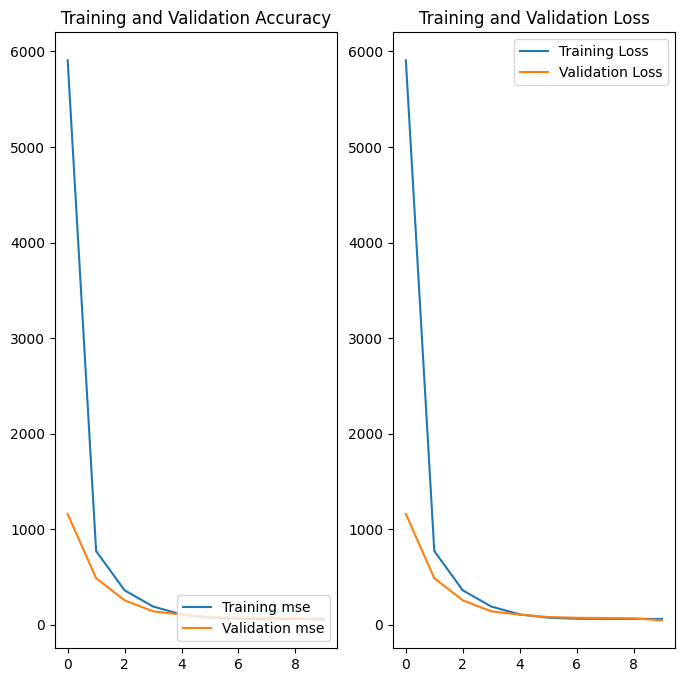

In [57]:

acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training mse')
plt.plot(epochs_range, val_acc, label='Validation mse')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [58]:
model.evaluate(test_set)

73/73 [==============================] - 4s 47ms/step - loss: 47.0819 - mean_squared_error: 47.0819


[47.0819091796875, 47.08191680908203]

In [34]:
model = tf.keras.models.load_model('best_model_checkpoint.h5')

In [35]:
model.save('Encoder_CNN_100_epochs_model.keras')

In [63]:
#evaluate model on test set example to calculate approx M value - we nake the same date files
test = np.load(file_list[numbers[-1]])#np.load(wrf_path+'wrfout_d01_2019-02-24_00%3A00%3A00.npy')
test_scaled = scale_data(test)
target_val = np.load(target_list[numbers[-1]])#target_path+'era_uv10_t2_2019-12-28.npy')
predict = model.predict(test_scaled)
#we add correction to the initial wrf test data
wrf_corrected = predict+test

1/1 [==============================] - 0s 150ms/step


In [64]:
#calculate approx M metrics
M_approx=(mean_squared_error(np.ravel(target_val), np.ravel(test))-mean_squared_error(np.ravel(target_val), np.ravel(wrf_corrected)))/mean_squared_error(np.ravel(target_val), np.ravel(test))
print(M_approx)

0.9984837760132252


In [36]:
M_approx=(mean_squared_error(np.ravel(target_val), np.ravel(test))-mean_squared_error(np.ravel(target_val))/mean_squared_error(np.ravel(target_val), np.ravel(test))
print(M_approx)

1.0


In [32]:
tf.__version__

'2.10.1'

In [60]:
target_list[numbers[-1]]

'C:\\Users\\User\\Desktop\\0-Rojects\\2023 International\\train\\target\\era_uv10_t2_2019-04-24.npy'

In [61]:
file_list[numbers[-1]]

'C:\\Users\\User\\Desktop\\0-Rojects\\2023 International\\train\\wrf\\wrfout_d01_2019-04-24_00%3A00%3A00.npy'

In [ ]:
[127, 103, 74, 10, 255, 170, 289, 124, 221, 286, 272, 267, 219, 295, 213, 138, 26, 128, 160, 218, 86, 130, 287, 25, 169, 174, 44, 145, 312, 140, 156, 311, 64, 308, 117, 106, 323, 244, 181, 137, 114, 14, 215, 52, 166, 90, 11, 224, 245, 20, 34, 118, 84, 331, 7, 249, 82, 111, 105, 220, 5, 254, 336, 281, 0, 350, 63, 42, 104, 275, 121, 329, 109, 75, 345, 332, 202, 168, 304, 322, 179, 276, 326, 110, 320, 165, 268, 112, 298, 45, 200, 340, 180, 233, 135, 199, 33, 122, 159, 18, 167, 225, 4, 263, 248, 173, 355, 234, 269, 139, 31, 48, 152, 241, 356, 162, 305, 314, 2, 70, 338, 68, 271, 309, 231, 306, 65, 330, 184, 293, 282, 107, 79, 27, 260, 258, 24, 347, 13, 344, 363, 239, 6, 285, 288, 339, 12, 240, 172, 35, 21, 123, 265, 250, 190, 195, 209, 321, 204, 163, 99, 205, 193, 186, 294, 95, 155, 334, 315, 201, 232, 342, 92, 197, 150, 211, 346, 72, 319, 273, 131, 229, 16, 100, 243, 116, 228, 59, 237, 23, 182, 98, 335, 61, 247, 206, 262, 236, 54, 217, 198, 257, 161, 313, 76, 8, 3, 185, 176, 274, 360, 364, 37, 96, 51, 307, 223, 214, 158, 310, 85, 47, 101, 171, 66, 296, 284, 203, 207, 333, 120, 297, 358, 40, 77, 246, 39, 32, 144, 264, 146, 56, 125, 134, 341, 30, 73, 357, 317, 327, 175, 300, 277, 132, 83, 337, 38, 196, 141, 302, 78, 283, 210, 256, 17, 29, 278, 212, 108, 149, 94, 81, 102, 208, 147, 318, 58, 343, 41, 192, 69, 153, 352, 351, 36, 261, 216, 1, 87, 301, 238, 291, 91, 325, 290, 252, 226, 178, 133, 189, 187, 129, 266, 251, 157, 154, 362, 303, 242, 188, 148, 15, 142, 361, 53, 93, 115, 222, 136, 227, 348, 191, 49, 67, 19, 353, 143, 80, 62, 359, 89, 280, 270, 299, 316, 97, 183, 43, 328, 119, 164, 349, 151, 292, 177, 259, 235, 253, 46, 194, 230, 9, 279, 71, 22, 28, 88, 354, 55, 60, 126, 50, 57, 324, 113]